## Plotting PDFS From SCAM Simulations ##

In [1]:
import numpy as np
import matplotlib.pyplot as mp
import xarray as xr
import pandas as pd
import glob
import seaborn as sbn


In [8]:
# Read files #
#cases = ['f.e21.FWscHIST.ne30_L32_cam6_3_019_plus_CESM2.2.001.hf',
#        'f.e21.FWscHIST.ne30_L48_BL10_cam6_3_019_plus_CESM2.2.001.hf']

#cases = ['FSCAM.T42_T42.togaII.zm.ke000','FSCAM.T42_T42.togaII.zm.ke000.L48','FSCAM.T42_T42.togaII.zm.ke000.L58','FSCAM.T42_T42.togaII.zm.ke000.L256']
cases = ['FSCAM.T42_T42.togaII.zm.par003','FSCAM.T42_T42.togaII.zm.par003.L48','FSCAM.T42_T42.togaII.zm.par003.L58','FSCAM.T42_T42.togaII.zm.par003.L256']

#cases = ['FSCAM.T42_T42.arm97.zm.ke000','FSCAM.T42_T42.arm97.zm.ke000.L48','FSCAM.T42_T42.arm97.zm.ke000.L58']
#cases = []'FSCAM.T42_T42.arm97.zm.par002','FSCAM.T42_T42.arm97.zm.par002.L48','FSCAM.T42_T42.arm97.zm.par002.L58']
#cnames = ['L32','L48','L58','L32.ZM1','L48.ZM1','L58.ZM1']



#cnames = ['L32','L48','L58','L32.ZM2','L48.ZM2','L58.ZM2']

### Resolution ##

#cnames = ['L32','L48','L58']
cnames = ['L32','L48','L58','L256']



season0 = 'DJF'

vname = 'ZMDT' ; vscale = 86400. ; vunits = 'K/day' ; xlims = [-80,10]
#vname = 'ZMDQ' ; vscale = 86400.*1000. ; vunits = 'g/kg/day' ; xlims = [-60,20]
#vname = 'ZMMU' ; vscale = 3600. ; vunits = 'kg/m2/hr' ; xlims = [-10,100] 
#vname = 'ZMMD' ; vscale = 3600. ; vunits = 'kg/m2/hr' ; xlims = [-30,10] 

#vname = 'T' ; vscale = 1. ; vunits = 'K' ; xlims = [280,310]
#vname = 'DCQ' ; vscale = 86400.*1000. ; vunits = 'g/kg/day'; xlims = [-100,20]
#vname = 'STEND_CLUBB' ; vscale = 86400./1004. ; vunits = 'K/day' ; xlims = [-20,80]
#vname = 'RVMTEND_CLUBB' ; vscale = 86400.*1000. ; vunits = 'g/kg/day' ; xlims = [-20,60]
#vname = 'PRECC' ; vscale = 86400.*1000. ; vunits ='mm/day' ; xlims = [-10,50]
#vname = 'PRECT' ; vscale = 86400.*1000. ; vunits ='mm/day' ; xlims = [-10,50]

vnamec = 'ZMDT' ; vscalec = 86400. ; vunitsc = 'K/day'

fdir0 = "/Users/rneale/nc_files/"


CASE =  FSCAM.T42_T42.togaII.zm.par003
/Users/rneale/nc_files/FSCAM.T42_T42.togaII.zm.par003.cam.h0.1992-12-18-64800.nc
[]


OSError: no files to open

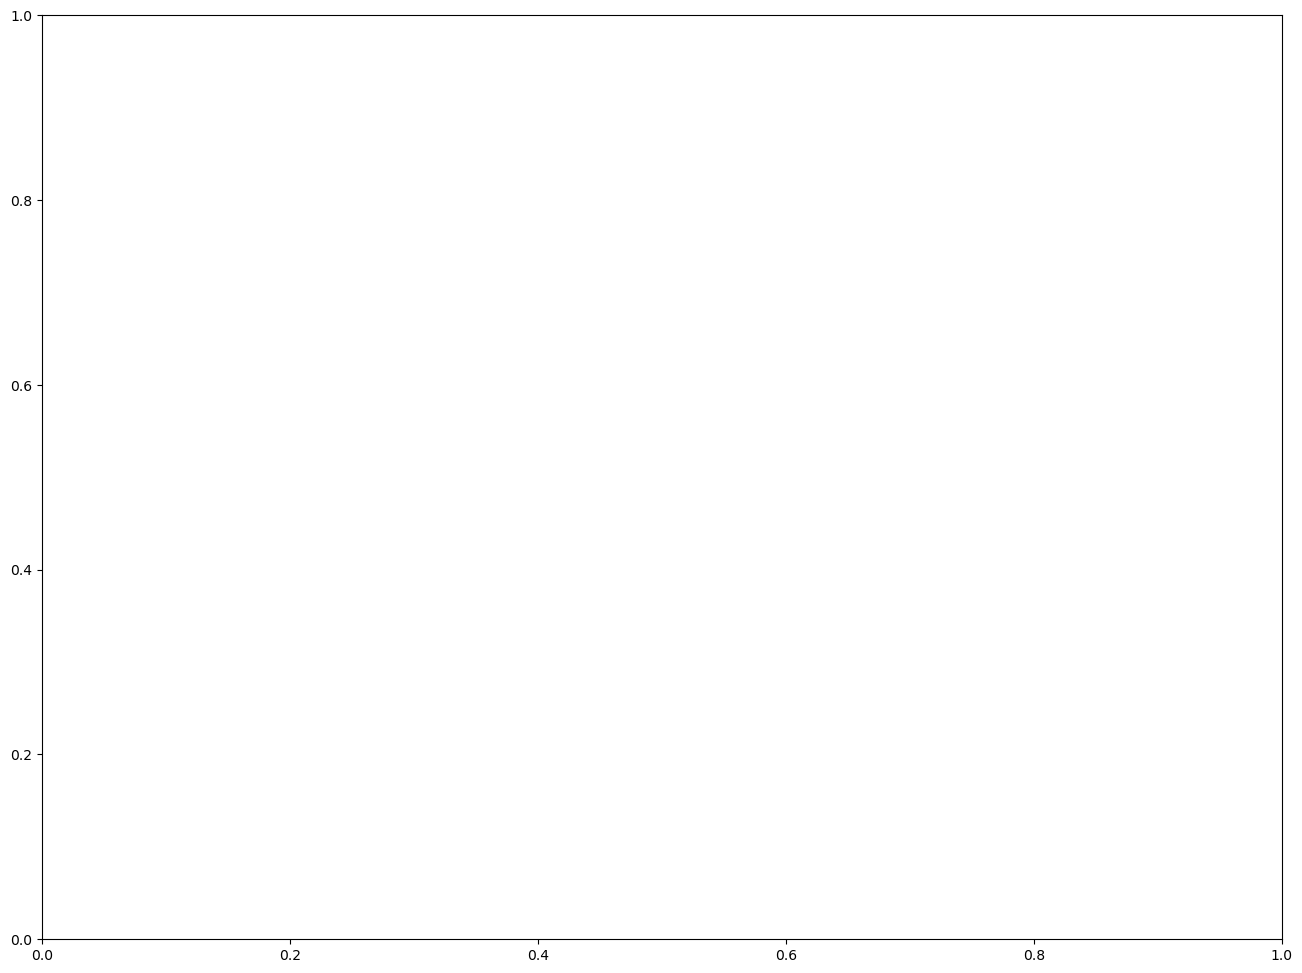

In [9]:
# PLOT HISTOGRAM #

plt1, ax1 = mp.subplots(1,1,figsize=(16, 12)) # Ave plot of all cases
#sbn.color_palette("colorblind")
colors = ['black','skyblue','olive','coral','purple']
#colors = ['black','blue','red','purple']

if cases[0].find('togaII')!=-1 : csuf =  '.cam.h0.1992-12-18-64800.nc' ; iop = 'TOGAII' 
if cases[0].find('arm97')!=-1 : csuf =  '.cam.h0.1997-06-18-84585.nc' ; iop = 'ARM97'
if cases[0].find('rico')!=-1 : csuf =  '.cam.h0.1995-07-15-00000.nc' ; iop = 'RICO' 
if cases[0].find('gateIII')!=-1 : csuf =  '.cam.h0.1974-08-30-00000.nc' ; iop = 'GATEIII' 


for ic,case in enumerate(cases):    
        
    fplot,vlong = pdf_data_proc(case,csuf,fdir0,vname,vscale) # Main variable

    if vname in ['PRECT','PRECC']:
        sbn.histplot(fplot, binwidth=0.5, color=colors[ic],linewidth=0.1,multiple="stack",kde=True)
        ax1.set_yscale('log')
        leg = ax1.legend(cnames,loc='upper right',fontsize=29)
    else:
        sbn.histplot(fplot, binwidth=0.5, color=colors[ic],linewidth=0.1,multiple="stack",kde=True) 
        leg = ax1.legend(cnames,loc='upper left',fontsize=29)

ylims = [1.,200]

ax1.set_xlim(xlims)
ax1.set_ylim(ylims)

ax1.set_title('Timesteps - '+vlong,fontsize=24)
ax1.set_ylabel('# gridpoints',fontsize=29) 
ax1.set_xlabel(vunits,fontsize=29)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.vlines(0.,ylims[0] ,ylims[1], color='black',linestyle="dashed",lw=1)

for line in leg.get_lines():
    line.set_linewidth(4.0)

plt1.savefig('pdf_zmpar_zm2_vres_toga_'+vname+'.png', dpi=100, bbox_inches='tight') 





In [6]:


def pdf_data_proc(case,csuf,fdir,vname,vscale):
    
    ''' Routines to process input data for this case for plotting PDF '''
    
    print('CASE = ',case)
    
    ffile = fdir+case+csuf          
    print(ffile)
    
    flist = glob.glob(ffile)

    print(flist)
    
    fhist =  xr.open_mfdataset(flist)             
    fhist = fhist.squeeze()
        
        
## Variable masking ##
    fprecc = 86400.*1000.*fhist['PRECC']
    
    if vname in ['PRECT','PRECC','PRECL']:
        if vname == 'PRECT' :
            fvar = fhist['PRECL']+fhist['PRECC'] 
            vlong = 'Total Precipitation Rate'
        else :
            fvar = fhist[vname]
            vlong = fhist[vname].attrs['long_name']
    else:
        fvar = fhist[vname][:,-1]
        vlong = fvar.attrs['long_name']    

    fvar = fvar.where(fprecc > 1.)

    pvar_1d = vscale*fvar.values.ravel()
    
    return pvar_1d,vlong